# How high of an incentive (measured through differences in overall GPA) do students face by enrolling in classes with relatively higher grade distributions?


## Diego Saldonid, PID: A12012095
## Roger Ruan, PID: A11186574
## Shu-Wei(Lucas) Hsu, PID: A12961177
## James Mata, PID: A12462782


## Introduction and Background

With grade inflation becoming a growing problem between public and private school we were interested in taking a closer look to see what may be happening within a school. As students, we often hear advice on which professor to take for a certain class because the chances of getting a good grade are higher. For many students at UCSD, who plan to pursue careers that involve more education or careers in their subject’s job market, GPA is an important factor to look competitive in these fields. This leads students to wait for a class to be taught by a certain professor in order to boost their transcripts and have a higher chance at success. This leads us to our questions: 

* **What would be the difference in GPA between students that happen to take professors with lower grade distributions relative to their fellow professors?**
* **If we are able to find a large enough disparity between these students, what would be our call to action?**
* **Furthermore, what might this reflect on the way classes are being taught, not only at UCSD but at other Universities?**
* **How can having a different GPA significantly impact one's future career such as graduate school and job hunting?**

As our reference allude to, just because they are getting higher grades does not imply that students are performing higher or learning more. The growing competition to get into medical school, grad school, or other competitive career fields incentives students to pursue a higher grade over leaving college with technical skills and knowledge. Also, are the classes with higher distribution, are they not challenging students as much or do they provide a better teaching environment?



## Data Description

The dataset used for our project is the UCSD Cape Evaluations, found at https://cape.ucsd.edu/responses/Results.aspx. This dataset has grade distributions for various classes among multiple disciplines at UCSD from Spring quarter 2007 to Spring Quarter 2017. We will be focusing on the following select majors: 

* Cognitive Science
* Biology
* Biochemistry
* Mechnical and Aerospace Engineering
* Chemistry
* Computer Science
    
From these majors, we will be analyzing required major courses.

Each data row has the following columns: 

* Professor/Instructor
* Course
* Term
* Number of Enrollment
* Number of Evaluations Made
* Recommended Class
* Recommended Instructor
* Study Hours/week
* Average Grade Expected
* Average Grade Received

After cleaning our data, we will be focusing on Instructor, Course, Term, Rcmnd Instr, Study Hrs/wk, and Avg Grade Received.

By comparing different students across different professors taken at different times we will be able to analyze any changes between professors as well as pick up on any trends that are happening within a certain department. By tracking the changes across multiple departments (to have an accurate representation of what is happening campus wide) we can compare how changes at UCSD agree or disagree with national trends. We will also compare the amount of study hours between the courses taught by professors of the same department, this will serve as an indicator on how rigorous classes may be, which may point to the differences in grade distributions.

After scraping the data, we disregard ones with NaN rows and data where the number of evaluations made for the class is under 40%.

Loading modules. We are using the beautiful soup library to scrap through different categories that are given with evaluations.

In [2]:
import ssl
import urllib.request
import pandas as pd
import numpy as np
import scipy.stats as stats
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import math

Here, we are setting up the dataframe for the data we are going to scrap. We create a function called scrapData that goes through the online dataset with a specified major and extract the data onto our dataframe. We create a variable of the column values and then create a dataframe using the implemented column variables. 

In [3]:
#all courses
def scrapData(links, i, dataFrame):
    gcontext = ssl.SSLContext(ssl.PROTOCOL_TLSv1)
    req = urllib.request.Request(url="https://cape.ucsd.edu/responses/Results.aspx?Name=&CourseNumber=" + links[i],
        data=b'None',headers={'User-Agent':' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'})
    handler = urllib.request.urlopen(req, context=gcontext)
    htmltext = handler.read()
    soup = BeautifulSoup(htmltext,'lxml')

    # Create four variables to score the scraped data in
    Name = []
    course = []
    courseNum = []
    rcmndClass = []
    term = []
    enroll = []
    evalMade = []
    rcmndInstructor = []
    studyHrs = []
    avgGradeExpected = []
    avgGradeReceived = []

    # Create an object of the first object that is class=dataframe
    table = soup.find(class_='styled')

    # Find all the <tr> tag pairs, skip the first one, then for each.
    for row in table.find_all('tr')[1:]:

        spans = row.find_all('span')
        a = row.find_all('a')

        # Create a variable of all the <td> tag pairs in each <tr> tag pair,
        col = row.find_all('td')

        # Create a variable of the string inside 1st <td> tag pair,
        column_1 = col[0].string
        # and append it to first_name variable
        Name.append(column_1)

        #find class name
        column_10 = a[0].text
        course.append(column_10)

        column_11 = a[0].text
        x = column_11.split("-")[0]
        x = x.split(" ")[1]
        courseNum.append(x)

        # Create a variable of the string inside 2nd <td> tag pair,
        column_2 = spans[1].text
        # and append it to last_name variable
        rcmndClass.append(column_2)

        # Create a variable of the string inside 3rd <td> tag pair,
        column_3 = col[2].string
        # and append it to age variable
        term.append(column_3)

        # Create a variable of the string inside 4th <td> tag pair,
        column_4 = col[3].text
        # and append it to enroll variable
        enroll.append(column_4)

        # Create a variable of the string inside 5th <td> tag pair,
        column_5 = spans[0].text
        # and append it to postTestScore variable
        evalMade.append(column_5)

        column_6 = spans[2].text
        rcmndInstructor.append(column_6)

        column_7 = spans[3].text
        studyHrs.append(column_7)

        column_8 = spans[4].text
        avgGradeExpected.append(column_8)

        column_9 = spans[5].text
        avgGradeReceived.append(column_9)

    # Create a variable of the value of the columns
    columns = {'Name': Name, 'rcmndClass': rcmndClass, 'term': term, 'enroll': enroll, 'evalMade': evalMade, 
               'rcmndInstructor':rcmndInstructor, 'studyHrs':studyHrs, 'avgGradeExpected':avgGradeExpected 
               ,'avgGradeReceived':avgGradeReceived, 'course':course, 'courseNum': courseNum}

    # Create a dataframe from the columns variable
    df = pd.DataFrame(columns)
    df = df[['Name', 'course', 'courseNum', 'term', 'enroll', 'evalMade', 'rcmndClass', 'rcmndInstructor','studyHrs', 
             'avgGradeExpected', 'avgGradeReceived' ]]
    return df

Right now, we're focusing on data relating to the cogs major and the core classes needed. 
**We will do so for other majors(Cognitive Science, Biology, Biochemistry, Mechnical and Aerospace Engineering, Chemistry, Computer Science) as well!**
We extract the data for the cogs major by scraping the data for each required course and the different professors that teach each course. We fill our dataframe using the scrapData function created above to give us raw data. 

In [4]:
#links = ['MATH+20B', 'MATH+20A']
cogsMajor = ['MATH+20A', 'MATH+20B','MATH+20C','MATH+20F','COGS+1','COGS+14A',
             'COGS+101A','COGS+102A','COGS+107A','CSE+7']
bioMajor = ['BILD+1', 'BILD+2', 'BILD+3', 'BILD+4', 'CHEM+140A', 'BIBD+102',
           'BICD+100', 'BIMM+101', 'BIPN+105']
maeMajor = ['MAE+106', 'MAE+130B', 'MAE131A', 'MAE110', 'MAE101', 'MAE143A']
allMajors = [bioMajor, cogsMajor, maeMajor]
dfTemp = pd.DataFrame()
dfT = pd.DataFrame();
for a in range(len(allMajors)):
    for i in range(len(allMajors[a])):
        dfTemp = scrapData(allMajors[a],i, dfT)
        dfT = dfT.append(dfTemp)

## Data Cleaning/Pre-processing

The data we got above is raw data. We have to clean it now by omitting rows where the grade is not available. To make sure the data points hold significance, we remove rows where the number of evaluations made is less than 40%. This allows a more accurate representation of grade distribution among students. 

Below we find the average grade received data

In [5]:
#define a function that can take characters out from grade data
def getAvgGradeData(dataFrame, column ):
    for k in range(len(dataFrame[column])):
        #split string in order to get rid of letters
        x = dataFrame[column][k]
        x = x.split('(')[1]
        x = x.split(')')[0]
        #set value to only number
        dataFrame.loc[k,(column)] = x

    #set to numeric value
    dataFrame[column] = pd.to_numeric(dataFrame[column])
    k = 0 #reset k
    return dataFrame

In [6]:
#define a function that can take characters off from recommendation rate
def getRcmndData(dataFrame, column ):
    for k in range(len(dataFrame[column])):
        y = dataFrame[column][k]
        y = y.split(" ")[0]
        dataFrame.loc[k,(column)] = y
        
    #set to numeric value
    dataFrame[column] = pd.to_numeric(dataFrame[column])
    k = 0 #rest k
    return dataFrame

We don't really care about rows where the grade distributions are not available. Also, we only take into account classes where at least 40% of the students enrolled made evaluations. A size of 40% is too small to represent accurate data. We establish the available class numbers and set that into a dataframe. We take off characters for average grade expected and received as well as characters for recommend the class and instructor. 

In [7]:
#converts the strings from enroll and evalMade to int
dfT.enroll = pd.to_numeric(dfT.enroll)
dfT.evalMade = pd.to_numeric(dfT.evalMade) 
#drops classes with N/a grade distributions 
dfT = dfT[dfT.avgGradeReceived != 'N/A'] 
dfT = dfT[dfT.avgGradeExpected != 'N/A'] 
#drops classes with less than 40% evals made
dfT = dfT[dfT.evalMade/dfT.enroll > .20]
dfT = dfT.reset_index(drop=True)
allClassNum = ['20A', '20B', '20C', '20F', '1' , '14A' , '101A' , '102A' , 
               '107A', '7', '2', '3', '4', '140A', '102', '100', '101', '105',
              '106', '130B', '131A', '110', '101', '143A']

dfT = dfT[dfT['courseNum'].isin(allClassNum)]
dfT = dfT.reset_index(drop = True)

#take off characters for avgGradeExpected and avgGradeReceivedavgGradeRecieved
dfT = getAvgGradeData(dfT, 'avgGradeReceived')
dfT = getAvgGradeData(dfT, 'avgGradeExpected')

#convert studyHrs to int
dfT.studyHrs = pd.to_numeric(dfT.studyHrs) 

#take off characters for rcmndClass and recmndInstructor
dfT = getRcmndData(dfT, 'rcmndClass')
dfT = getRcmndData(dfT, 'rcmndInstructor')

In [8]:
#initialize maximum possible GPA
maxGpa = []
minGpa = []

In [9]:
cogsClassNum = ['20A', '20B', '20C', '20F', '1' , '14A' , '101A' , '102A' , '107A', '7']
def gpaValue (classes, i, df):
    #get the data and clean it
    course = scrapData(classes,i, df)
    course.enroll = pd.to_numeric(course.enroll)
    course.evalMade = pd.to_numeric(course.evalMade)
    course = course[course.avgGradeReceived != 'N/A'] 
    #drops classes with less than 40% evals made
    course = course[course.evalMade/course.enroll > .40]
    #reset index
    course = course.reset_index(drop=True)

    course = course[course['courseNum'].isin(cogsClassNum)]
    course = course.reset_index(drop=True)

    for k in range(len(course['avgGradeReceived'])):
        x = course['avgGradeReceived'][k]
        #split string in order to get rid of letters
        x = x.split("(")[1]
        x = x.split(')')[0]
        #set value to only number
        course.loc[k,('avgGradeReceived')] = x

    #set to numeric value
    course.avgGradeReceived = pd.to_numeric(course.avgGradeReceived)

    #get the maximum value
    rowMax = course['avgGradeReceived'].idxmax()
    rowMin = course['avgGradeReceived'].idxmin()

    #get the GPA and format it in hundreds
    maxGpa.append(math.ceil((course['avgGradeReceived'][rowMax])*100)/100)
    minGpa.append(math.ceil((course['avgGradeReceived'][rowMin])*100)/100)

In [10]:
#get gpa values for all classes
df_1 = pd.DataFrame();
for i in range(len(cogsMajor)):
    gpaValue(cogsMajor, i, df_1)

In [11]:
#make it as a dataFrame for further use
gpaStats = pd.DataFrame(
    {'course': cogsMajor,
     'maxGpa': maxGpa,
     'minGpa': minGpa
    })
gpaStats

course  maxGpa  minGpa
0   MATH+20A    3.45    1.87
1   MATH+20B    3.22    1.94
2   MATH+20C    3.67    2.32
3   MATH+20F    3.20    2.01
4     COGS+1    3.62    2.52
5   COGS+14A    3.34    2.69
6  COGS+101A    3.39    2.68
7  COGS+102A    3.55    3.08
8  COGS+107A    3.19    2.79
9      CSE+7    3.50    2.95

## Data Analysis and Results

With this data we will be able to track changes in student GPA for the last ten years. We will compare changes in GPA across departments, we can see if UCSD follows national trends while keeping our datapool campus wide. Comparing study hours bewteen the courses taught by professors of the same department allows us to analyze study methods as a descrepency. Ultimately, we are looking to see if students who take professors with higher grade distributions and students who take professors with lower grade distributions and see how much of an impact the difference in professors have on students' overall GPA.

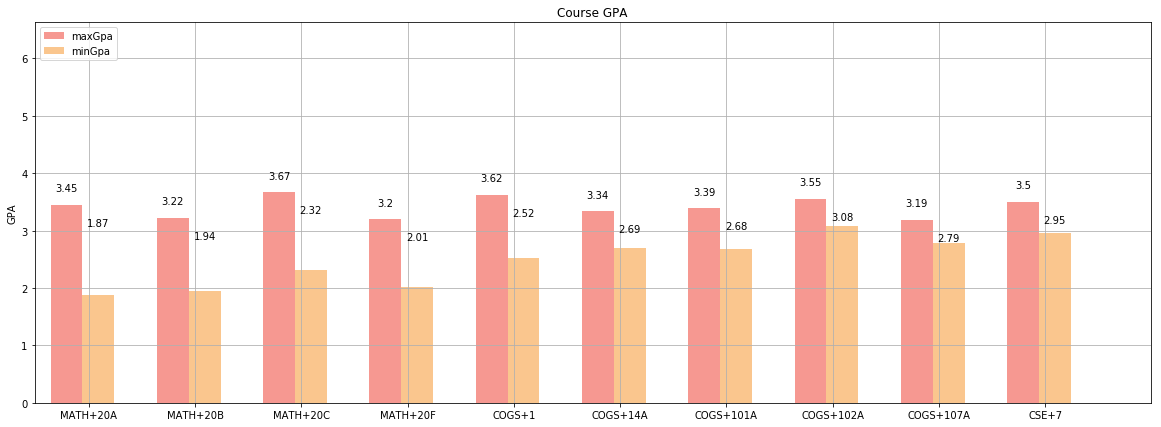

In [12]:
# Setting the positions and width for the bars
pos = list(range(len(gpaStats['course'])))
width = 0.3

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,7))

# Create a bar with gpa data,
# in position pos,
plt.bar(pos, gpaStats['maxGpa'], width, alpha=0.5, color='#EE3224', label=gpaStats['course'][0])
plt.bar([p + width for p in pos], gpaStats['minGpa'], width, alpha=0.5, color='#F78F1E', label=gpaStats['course'][1])

# Set the y axis label, title, and positions of x
ax.set_ylabel('GPA')
ax.set_title('Course GPA')
ax.set_xticks([p + 0.7 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(gpaStats['course'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(gpaStats['maxGpa'] + gpaStats['minGpa'])] )

rects = ax.patches

#add number labels
for rect, label in zip(rects, gpaStats.maxGpa):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha='center', va='bottom')

rects = ax.patches
for rect, label in zip(rects, gpaStats.minGpa):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2 + 0.3, height - 0.4 , label, ha='center', va='bottom')

# Adding the legend and showing the plot
plt.legend(['maxGpa', 'minGpa'], loc='upper left')
plt.grid()
plt.show()

In the graph above, the best average GPA is a 3.67 for those in MATH 20C while the worst average GPA is a 1.87 in MATH 20A. COGS 107A has the smallest range between the highest average GPA and lowest average GPA while MATH 20A has the largest range. This means in classes like MATH 20A, there are professors that grade significantly harsher than others, causing a fluctuation in GPAs, but classes like COGS 107A have professors who grade around the same. Overall, with the highest GPA average being 3.67( A- is 3.7) and the lowest GPA average being 1.87 (C is 2.0), there's a difference of 1.8 (**more than a letter grade**). That's a huge significance when it comes to choosing which professor for each class. 

In the graph below represents a student who did average in every class where the class average was the highest compared to a student who did average in every class where the class average was the lowet. Both students did average in their respective classes but one student has nearly 1.0 higher overall GPA, a whole letter grade higher, than the other, from averaging in the higher scoring class. This shows that the professors chosen during course selection affected their GPA. 


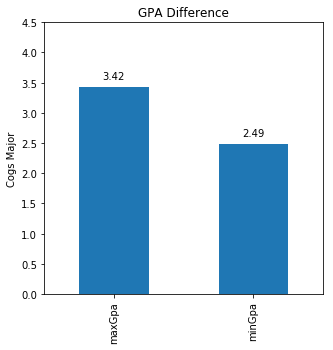

In [13]:
#do a comparison between maximum possible GPA and minimum possible GPA
avgMax = math.ceil(sum(maxGpa)/len(maxGpa) *100)/100
avgMin = math.ceil(sum(minGpa)/len(minGpa) *100)/100

comparison = [avgMax, avgMin]   # bring some raw data
freq_series = pd.Series.from_array(comparison) 

x_labels = ['maxGpa' + 'minGpa']

# now to plot the figure
plt.figure(figsize=(5, 5))
ax = freq_series.plot(kind='bar')
plt.ylim([0, 4.5] )

rects = ax.patches

for rect, label in zip(rects, comparison):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom')
    
objects = ('maxGpa', 'minGpa')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Cogs Major')
plt.title('GPA Difference')
plt.show()

We want to get a random sample grade to compare the discrepency between choosing a professor who is more lenient with their grading and one who grades harsher. To do this we randomly choos 1000 students' GPAs

In [14]:
n = 1000
RanGpaStudents = [[] for _ in range(n)]
def getRandom (classes, i, df):
    #get the data and clean it
    course = scrapData(classes,i, df)
    course.enroll = pd.to_numeric(course.enroll)
    course.evalMade = pd.to_numeric(course.evalMade)
    course = course[course.avgGradeReceived != 'N/A'] 
    #drops classes with less than 40% evals made
    course = course[course.evalMade/course.enroll > .40]
    #reset index
    course = course.reset_index(drop=True)

    course = course[course['courseNum'].isin(cogsClassNum)]
    course = course.reset_index(drop=True)

    for k in range(len(course['avgGradeReceived'])):
        x = course['avgGradeReceived'][k]
        #split string in order to get rid of letters
        x = x.split("(")[1]
        x = x.split(')')[0]
        #set value to only number
        course.loc[k,('avgGradeReceived')] = x

    #set to numeric value
    course.avgGradeReceived = pd.to_numeric(course.avgGradeReceived)
    
    #get randon sample grade 
    for i in range(1000):
        randomGpa = course['avgGradeReceived'].sample(n = 1)
        RanGpaStudents[i].append(float(randomGpa))

In [15]:
df_1 = pd.DataFrame();
for i in range(len(cogsMajor)):
    getRandom(cogsMajor, i, df_1)

We create the dataframe with 1000 random student GPAs for Cogs major courses. We'll use the random student grade distributions to compare with each other to see if we can find a discrepency. We substitute the course numbers with 0-9 so it can be read easier. 

In [16]:
gpaRanStudent = pd.DataFrame.from_dict(RanGpaStudents) #creates dataframe with 1000 random students grade distribution
gpaRanStudent = gpaRanStudent.transpose() #turns rows into columns 
course = pd.DataFrame({'course': cogsMajor}) #creates dataframe for Cogs courses
random_students = pd.concat([course,gpaRanStudent], axis = 1) # creates dataframe with 1000 random students for Cogs courses
gpaRanStudent

0     1     2     3     4     5     6     7     8     9    ...    990  \
0  2.46  2.62  2.93  2.72  2.36  2.95  2.72  2.81  2.41  2.73  ...   2.93   
1  2.47  2.80  2.88  2.88  2.84  2.84  2.83  3.10  2.19  2.38  ...   2.63   
2  2.86  2.76  2.96  2.73  2.76  2.64  2.77  2.40  2.78  2.66  ...   2.82   
3  2.71  2.67  2.01  2.64  2.67  2.68  2.85  2.78  2.72  2.78  ...   2.75   
4  3.11  3.22  3.33  3.22  3.62  3.03  3.12  3.05  2.86  2.99  ...   2.86   
5  3.05  3.22  3.34  3.21  3.05  3.01  3.03  3.22  3.21  3.12  ...   2.69   
6  3.16  3.15  3.05  3.05  2.68  3.04  2.68  3.02  3.15  3.15  ...   3.05   
7  3.08  3.11  3.21  3.33  3.33  3.33  3.08  3.55  3.33  3.25  ...   3.14   
8  3.19  3.19  2.99  2.91  2.95  2.79  2.95  2.95  2.91  2.83  ...   2.82   
9  3.50  3.24  3.24  3.38  2.95  3.21  3.38  3.21  3.38  3.38  ...   3.38   

    991   992   993   994   995   996   997   998   999  
0  2.46  2.73  2.38  3.17  2.63  2.38  2.55  2.87  2.92  
1  2.40  3.03  2.83  2.58  2.63  3.13  2.62  2.63  2.71  
2  2.54  2.90  2.45  3.67  2.40  2.79  2.49  2.32  2.62  
3  2.99  2.67  2.54  2.90  2.79  3.18  2.76  2.99  2.95  
4  2.69  3.28  2.69  3.04  3.15  3.53  2.68  2.95  3.12  
5  3.31  3.12  3.03  3.22  3.12  3.34  3.31  3.31  3.12  
6  3.05  3.15  3.15  2.68  2.83  3.39  2.83  3.16  2.68  
7  3.33  3.14  3.33  3.55  3.55  3.33  3.33  3.25  3.14  
8  2.83  2.99  2.86  2.95  3.19  2.95  2.91  2.79  2.79  
9  3.47  3.50  3.47  3.24  3.47  3.47  3.22  3.50  3.47  

[10 rows x 1000 columns]

In [17]:
#covert to int
gpaRanStudent = gpaRanStudent.apply(pd.to_numeric)

Here we find the random overall GPA 

In [18]:
def get_random_overall_GPA(randomStudentData, array):
    for i in range(len(randomStudentData.columns)):
        x = sum(randomStudentData[i])/10
        x = math.ceil(x*100)/100
        array.append(x)

The histogram below shoes the frequency of the distribution of random students. This graph shows a pretty average distribution of GPA over random students. The bell curve is pretty standard so the data is reliable and not skewed. 

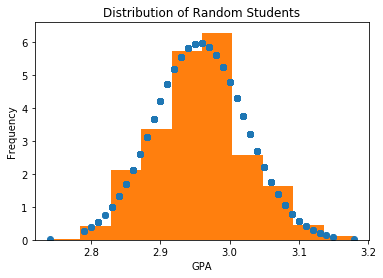

In [20]:
stats.normaltest(ran_students_overall)

fit = stats.norm.pdf(ran_students_overall, np.mean(ran_students_overall), np.std(ran_students_overall))  #this is a fitting indeed

plt.plot(ran_students_overall,fit,'o')

plt.hist(ran_students_overall,normed=True)      #use this to draw histogram of your data

plt.ylabel('Frequency')
plt.xlabel('GPA')
plt.title('Distribution of Random Students')
plt.show()    

In [19]:
ran_students_overall = []
get_random_overall_GPA(gpaRanStudent, ran_students_overall)

We want to see how student satisfaction also plays a role so separate the good and bad professors based on percentage of students who recommends the professor. If more than 85% of the class recommends the professor, he would be a good professor. Otherwise, he's a bad professor for not haven't enough recommendations.

To do this, we clean the classes dataset and then loop it. We loop to find the average grade received and then loop again to find the rate of which students recommended professors and update the course columns appropriately. Finally we split the professors to good anad bad professors

In [37]:
cogsClassNum = ['20A', '20B', '20C', '20F', '1' , '14A' , '101A' , '102A' , '107A', '7']

classes = cogsMajor
df = pd.DataFrame()
i = 0
goodProf = pd.DataFrame() 
badProf = pd.DataFrame() 

for i in range(len(cogsMajor)):
    course = scrapData(classes, i, df)
    course.enroll = pd.to_numeric(course.enroll)
    course.evalMade = pd.to_numeric(course.evalMade)
    course = course[course.avgGradeReceived != 'N/A'] 
    #drops classes with less than 40% evals made
    course = course[course.evalMade/course.enroll > .40]
    #reset index
    course = course.reset_index(drop=True)

    course = course[course['courseNum'].isin(cogsClassNum)]
    course = course.reset_index(drop=True)
    
    for j in range(len(course['avgGradeReceived'])):
        x = course['avgGradeReceived'][j]
        #split string in order to get rid of letters
        x = x.split("(")[1]
        x = x.split(')')[0]
        #set value to only number
        course.loc[j,('avgGradeReceived')] = x
    
    #set to numeric value
    course.avgGradeReceived = pd.to_numeric(course.avgGradeReceived)
  
    #take out the percentage, only keep as interger
    for k in range(len(course['rcmndInstructor'])):
        y = course['rcmndInstructor'][k]
        y = y.split(" ")[0]
        course.loc[k,('rcmndInstructor')] = y
    course.rcmndInstructor = pd.to_numeric(course.rcmndInstructor)

    #seperate good and bad professors based on the recommendation rate
    goodProf = goodProf.append(course[course.rcmndInstructor >= 85.0])
    badProf = badProf.append(course[course.rcmndInstructor < 85.0])

We get a random GPAs from students who has taken a good professor and random GPAs from students who has taken a bad professor. 

In [22]:
goodProf = goodProf.reset_index(drop=True) #reset index
badProf = badProf.reset_index(drop=True) #reset index

n = 1000
RanGpaStudents = [[] for _ in range(n)]
RanGpaStudents2 = [[] for _ in range(n)]
def getRandom2 (classes, i, df): 
    #get randon sample grade 
    for i in range(1000):
        randomGpa = goodProf['avgGradeReceived'].sample(n = 1)
        RanGpaStudents[i].append(float(randomGpa))
        randomGpa2 = badProf['avgGradeReceived'].sample(n = 1)
        RanGpaStudents2[i].append(float(randomGpa2))

In [23]:
randomGpa = goodProf['avgGradeReceived'].sample(n = 1)
randomGpa2 = badProf['avgGradeReceived'].sample(n = 1)
randomGpa2

153    2.81
Name: avgGradeReceived, dtype: float64

Creating a dataframe filled with random GPAs from the cogs department

In [24]:
df_1 = pd.DataFrame();
for i in range(len(cogsMajor)):
    getRandom2(cogsMajor, i, df_1)

Create a dataframe with 1000 random studnet GPAs from students who have taken a good professor from 10 different courses.

In [25]:
gpaRanStudent = pd.DataFrame.from_dict(RanGpaStudents) #creates dataframe with 1000 random students grade distribution
gpaRanStudent = gpaRanStudent.transpose() #turns rows into columns 
course = pd.DataFrame({'course': cogsMajor}) #creates dataframe for Cogs courses
good_students = pd.concat([course,gpaRanStudent], axis = 1) # creates dataframe with 1000 random students for Cogs courses
good_students

course     0     1     2     3     4     5     6     7     8  ...   \
0   MATH+20A  2.70  2.96  2.60  2.62  2.58  2.79  2.95  2.88  2.91  ...    
1   MATH+20B  2.72  2.54  3.28  2.80  2.54  2.33  2.96  2.92  2.53  ...    
2   MATH+20C  2.96  2.76  2.77  2.45  2.69  2.53  2.78  2.80  3.04  ...    
3   MATH+20F  2.82  3.45  2.64  2.28  2.64  2.80  3.47  3.17  2.71  ...    
4     COGS+1  2.75  2.41  3.01  2.96  2.76  3.04  2.91  2.41  3.31  ...    
5   COGS+14A  3.47  3.22  2.80  2.44  2.53  2.35  2.99  3.21  2.75  ...    
6  COGS+101A  2.95  2.44  3.20  3.16  3.18  2.59  2.76  2.58  2.79  ...    
7  COGS+102A  3.16  2.50  2.76  3.04  3.38  2.77  3.28  2.90  3.15  ...    
8  COGS+107A  2.71  2.70  2.46  2.51  2.95  2.88  2.53  2.53  3.33  ...    
9      CSE+7  2.80  2.77  3.08  3.05  2.28  2.66  2.66  2.72  3.01  ...    

    990   991   992   993   994   995   996   997   998   999  
0  3.21  2.86  2.53  2.50  3.17  2.88  3.67  2.96  2.53  3.53  
1  2.23  2.81  2.83  2.62  3.02  3.21  2.91  2.53  3.21  2.53  
2  2.54  3.15  2.80  2.50  2.73  2.80  2.91  3.03  2.92  2.26  
3  3.34  2.82  2.41  2.53  3.17  2.63  2.26  2.82  2.95  2.76  
4  3.05  3.04  2.83  2.87  2.92  2.57  2.54  2.33  3.24  2.50  
5  2.77  2.86  3.31  3.47  2.51  2.51  3.21  3.45  2.53  2.63  
6  2.95  2.88  2.39  3.16  3.40  3.21  2.83  3.16  2.51  3.25  
7  3.34  2.89  2.95  3.34  3.24  3.31  2.57  3.39  2.77  3.24  
8  2.89  2.82  2.39  3.19  2.88  2.69  2.63  2.77  2.80  3.05  
9  2.46  3.16  2.68  2.63  2.62  2.50  2.57  2.50  2.91  2.62  

[10 rows x 1001 columns]

Create a dataframe filled with 1000 random student GPAs from students who have taken a bad professor from 10 different courses.

In [26]:
gpaRanStudent2 = pd.DataFrame.from_dict(RanGpaStudents2) #creates dataframe with 1000 random students grade distribution
gpaRanStudent2 = gpaRanStudent2.transpose() #turns rows into columns 
course = pd.DataFrame({'course': cogsMajor}) #creates dataframe for Cogs courses
bad_students = pd.concat([course,gpaRanStudent2], axis = 1) # creates dataframe with 1000 random students for Cogs courses
bad_students

course     0     1     2     3     4     5     6     7     8  ...   \
0   MATH+20A  2.80  2.60  2.70  2.53  2.68  3.13  2.66  2.88  2.75  ...    
1   MATH+20B  2.64  2.90  2.86  2.65  3.05  2.60  2.56  2.80  2.88  ...    
2   MATH+20C  2.87  2.47  3.21  2.68  2.34  2.66  3.10  3.13  2.47  ...    
3   MATH+20F  2.77  2.90  3.07  2.65  2.50  2.85  2.63  3.13  2.54  ...    
4     COGS+1  2.85  3.12  2.86  2.77  2.85  2.43  3.03  2.53  2.68  ...    
5   COGS+14A  3.33  3.11  2.76  2.32  3.11  2.65  2.69  2.66  2.36  ...    
6  COGS+101A  2.69  2.73  2.72  2.64  2.41  2.62  2.81  2.60  3.03  ...    
7  COGS+102A  2.85  2.68  2.88  2.32  2.84  2.62  2.92  3.55  3.11  ...    
8  COGS+107A  2.74  2.69  2.68  2.87  3.21  2.93  2.54  3.15  2.79  ...    
9      CSE+7  2.63  2.75  2.72  3.12  2.85  2.62  2.69  2.47  2.82  ...    

    990   991   992   993   994   995   996   997   998   999  
0  3.13  2.65  2.65  2.85  2.63  2.77  2.75  2.72  3.62  3.29  
1  2.80  2.43  2.60  2.62  2.77  2.85  2.66  2.69  2.75  2.78  
2  2.45  2.41  2.73  2.74  2.63  2.77  2.32  2.76  2.74  3.50  
3  3.10  2.85  2.79  2.41  2.63  2.64  2.68  2.14  3.11  2.64  
4  2.83  2.67  2.66  2.40  2.45  2.63  2.46  2.67  2.74  3.22  
5  2.45  3.11  3.26  2.40  2.79  3.55  3.13  2.19  2.71  2.99  
6  3.19  2.54  2.66  2.43  2.95  2.41  2.66  2.87  2.55  2.79  
7  2.70  1.94  2.68  3.11  2.45  2.66  2.79  3.33  2.70  3.04  
8  2.75  2.66  2.72  2.14  2.45  3.19  2.69  2.70  2.45  3.11  
9  3.10  2.34  2.84  3.11  3.62  3.13  2.68  2.14  2.46  2.34  

[10 rows x 1001 columns]

Here, we find the random overall GPA of the bad professors students and the random overall GPA of the good prfoessors students. 

In [27]:
bad_students_GPA = []
good_students_GPA = []
bad_students = bad_students.drop('course', 1)
good_students = good_students.drop('course',1)

get_random_overall_GPA(bad_students,bad_students_GPA)
get_random_overall_GPA(good_students,good_students_GPA)

In [28]:
myarray = np.asarray(bad_students_GPA)
myarray2 = np.asarray(good_students_GPA)

#normal test check
s1, pv1 = stats.normaltest(myarray) 
s2, pv2 = stats.normaltest(myarray2)
print(s1,pv1,s2,pv2)

0.749007866359 0.687630304777 1.65467241563 0.437212379434


Assuming that p-value is 0.05, We know that good_students_GPA and bad_students_GPA are normally distributed because the p-value are way greater than 0.05

We would want to do some hypothesis testing now. 2-sample t test is a good hypothesis test for the current data we have. 
*  Our null hypothesis is that the mean GPA in poorer rating professors' classes should be the same of the mean GPA in better rating professors's classes
*  Our alternative hypothesis is that mean GPA in better rating professors's classes is higer(larger) than the mean GPA in poorer rating professors' classes

In [29]:
#If True, perform a standard independent 2 sample test that assumes equal population 
t, p = stats.ttest_ind(myarray, myarray2)
print("ttest_ind:            t = %g  p = %g" % (t, p))
#print( np.std(bad_students_GPA), np.std(good_students_GPA) )

ttest_ind:            t = -23.8379  p = 9.65096e-111


Assuming that the significane value $\alpha$ is 0.05. From the t-test result above, we know the p-value of 9.65096x10^-111 is smaller than $\alpha$. That is, **we can reject our null hypothesis, and conclude that better rating professors tend to have higher GPA in the class.**

Now, we want to test and see if there is a strong correlation between **studyHrs** and **recommended instructor rate**. We are going to use the linear regression testing method.

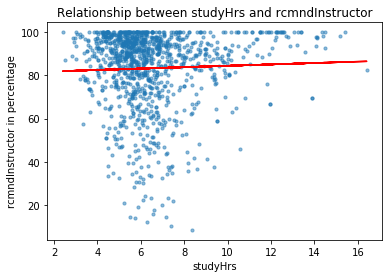

slope: 0.322328416815 intercept: 81.2531784139 r_value: 0.03759521981 p_value: 0.203261783083


In [30]:
#plot scatterplot between studyHrs and Instructor rate
area = 10

#plotting
plt.scatter(dfT.studyHrs, dfT.rcmndInstructor, s=area, alpha=0.5)
plt.title('Relationship between studyHrs and rcmndInstructor')
plt.xlabel('studyHrs')
plt.ylabel('rcmndInstructor in percentage')

slope, intercept, r_value, p_value, std_err = stats.linregress(dfT.studyHrs,dfT.rcmndInstructor)
abline_values = [slope * i + intercept for i in dfT.studyHrs]

plt.plot(dfT.studyHrs, abline_values, 'b', c='red')
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we don't really see any correlation between studyHrs and recommended instructor rate. The slope is 0.332, intercept is 81.25, p_value is 0.203. The r value (indicates correlation relationship) is very small that we cannot conclude any correlation between studyHrs and recommend instructor rate. 

Now, we want to test and see if there is a strong correlation between **AvgGradeReceived** and **rcmndInstructor**. We are going to use the linear regression testing method.

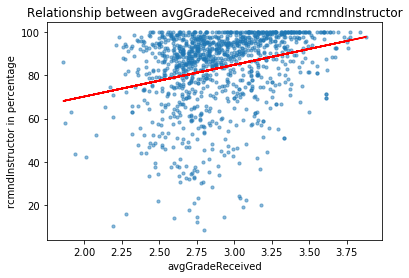

slope: 14.6905903096 intercept: 40.8653955725 r_value: 0.267051224746 p_value: 3.51045375805e-20


In [31]:
#plot scatterplot between GPA and Instructor rate
area = 10

#plotting
plt.scatter(dfT.avgGradeReceived, dfT.rcmndInstructor, s=area, alpha=0.5)
plt.title('Relationship between avgGradeReceived and rcmndInstructor')
plt.xlabel('avgGradeReceived')
plt.ylabel('rcmndInstructor in percentage')

slope, intercept, r_value, p_value, std_err = stats.linregress(dfT.avgGradeReceived,dfT.rcmndInstructor)

abline_values = [slope * i + intercept for i in dfT.avgGradeReceived]

plt.plot(dfT.avgGradeReceived, abline_values, 'b', c='red')
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we don't really see any correlation between avgGradeReceived and recommended instructor rate. The slope is 14.69, intercept is 40.87, p_value is 3.51 x 10^-20. The r value (indicates correlation relationship) is 0.267, smaller than 0.5. Because of this, we cannot conclude any correlation between studyHrs and recommend instructor rate. 

We are going to use the linear regression method to test the correlation between **average grade expected** and **recommended instructor**

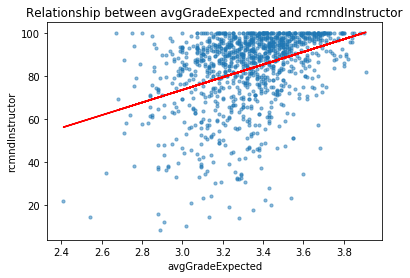

slope: 29.4320171205 intercept: -14.6377897203 r_value: 0.371689521374 p_value: 6.81831649327e-39


In [32]:
#plot scatterplot between avgGradeExpected and rcmndInstructor
area = 10

#plotting
plt.scatter(dfT.avgGradeExpected, dfT.rcmndInstructor, s=area, alpha=0.5)
plt.title('Relationship between avgGradeExpected and rcmndInstructor')
plt.xlabel('avgGradeExpected')
plt.ylabel('rcmndInstructor')

slope, intercept, r_value, p_value, std_err = stats.linregress(dfT.avgGradeExpected, dfT.rcmndInstructor)

abline_values = [slope * i + intercept for i in dfT.avgGradeExpected]

plt.plot(dfT.avgGradeExpected, abline_values, 'b', c='red')
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we don't really see any correlation between avgGradeExpected and recommended instructor rate. The slope is 29.432, intercept is -14.64, p_value is 6.818 x 10^-39. The r value (indicates correlation relationship). The r value (indicates correlation relationship) is 0.372, smaller than 0.5. Because of this, we cannot conclude any correlation between studyHrs and recommend instructor rate. 

We are going to use the linear regression method to test the correlation between **average grade expected** and **recommended instructor**

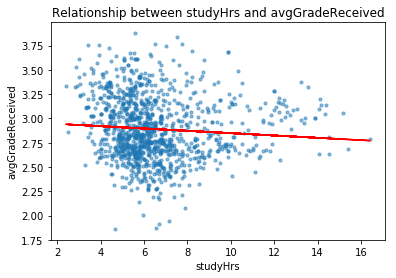

slope: -0.011991002211 intercept: 2.96853741678 r_value: -0.0769368125281 p_value: 0.00914268343018


In [33]:
#plot scatterplot between studyHrs and GPA
area = 10

#plotting
plt.scatter(dfT.studyHrs, dfT.avgGradeReceived, s=area, alpha=0.5)
plt.title('Relationship between studyHrs and avgGradeReceived')
plt.xlabel('studyHrs')
plt.ylabel('avgGradeReceived')

slope, intercept, r_value, p_value, std_err = stats.linregress(dfT.studyHrs, dfT.avgGradeReceived)

abline_values = [slope * i + intercept for i in dfT.studyHrs]

plt.plot(dfT.studyHrs, abline_values, 'b', c='red')
plt.show()

print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we don't really see any correlation between studyHrs and avgGradeReceived. The slope is -0.012, intercept is 2.97, p_value is 0.009. The r value (indicates correlation relationship) is -0.077, smaller than 0.5. The correlation coefficient is extremely small. Because of this, we cannot conclude any correlation between studyHrs and recommend instructor rate. 

We are going to use the linear regression method to test the correlation between **average grade expected** and **study hours**

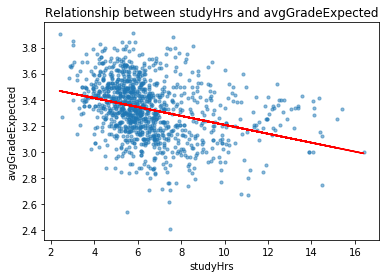

slope: -0.0341684914575 intercept: 3.54966862335 r_value: -0.315572789042 p_value: 6.13924581369e-28


In [38]:
#plot scatterplot between studyHrs and GPA
area = 10

#plotting
plt.scatter(dfT.studyHrs, dfT.avgGradeExpected, s=area, alpha=0.5)
plt.title('Relationship between studyHrs and avgGradeExpected')
plt.xlabel('studyHrs')
plt.ylabel('avgGradeExpected')

slope, intercept, r_value, p_value, std_err = stats.linregress(dfT.studyHrs, dfT.avgGradeExpected)

abline_values = [slope * i + intercept for i in dfT.studyHrs]

plt.plot(dfT.studyHrs, abline_values, 'b', c='red')
plt.show()

print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we don't really see any correlation between avgGradeExpected and studyHrs. The slope is -0.0342, intercept is 3.55, p_value is 6.1392 x 10^-28. The r value (indicates correlation relationship) is -0.316, smaller than 0.5. Because of this, we cannot conclude any correlation between studyHrs and recommend instructor rate. 

We are going to use the linear regression method to test the correlation between **average grade expected** and **average grade received**

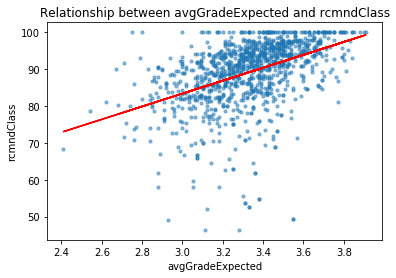

slope: 17.4931442577 intercept: 30.8997396595 r_value: 0.442687604854 p_value: 3.10780946699e-56


In [35]:
#plot scatterplot between avgGradeExpected and avgGradeReceived
area = 10

#plotting
plt.scatter(dfT.avgGradeExpected, dfT.rcmndClass, s=area, alpha=0.5)
plt.title('Relationship between avgGradeExpected and rcmndClass')
plt.xlabel('avgGradeExpected')
plt.ylabel('rcmndClass')

slope, intercept, r_value, p_value, std_err = stats.linregress(dfT.avgGradeExpected, dfT.rcmndClass)

abline_values = [slope * i + intercept for i in dfT.avgGradeExpected]

plt.plot(dfT.avgGradeExpected, abline_values, 'b', c='red')
plt.show()

print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we don't really see any correlation between avgGradeExpected and recommended class rate. The slope is 17.49, intercept is 30.8997, p_value is 3.1078 x 10^-56.The r value (indicates correlation relationship) is 0.443, smaller than 0.5. Because of this, we cannot conclude any correlation between studyHrs and recommend instructor rate. 

We are going to use the linear regression method to test the correlation between **average grade expected** and **recommended class**

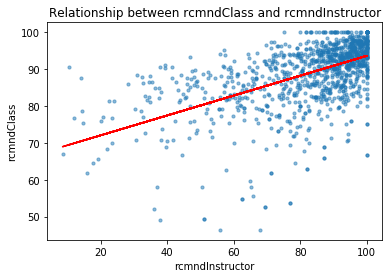

slope: 0.269526927204 intercept: 66.6700580314 r_value: 0.540096489228 p_value: 7.70809343304e-88


In [36]:
#plot scatterplot between avgGradeExpected and rcmndClass
area = 10

#plotting
plt.scatter( dfT.rcmndInstructor, dfT.rcmndClass, s=area, alpha=0.5)
plt.title('Relationship between rcmndClass and rcmndInstructor')
plt.xlabel('rcmndInstructor')
plt.ylabel('rcmndClass')

slope, intercept, r_value, p_value, std_err = stats.linregress( dfT.rcmndInstructor,dfT.rcmndClass)

abline_values = [slope * i + intercept for i in dfT.rcmndInstructor]

plt.plot(dfT.rcmndInstructor, abline_values, 'b', c='red')
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

From the graph above, we see a correlation between recommended class and recommended instructor rate. The slope is 0.26953, intercept is 66.67, p_value is 7.7081 x 10^-88. The r value (indicates correlation relationship) is 0.54, greater than 0.5. Because of this, we can conclude a correlation between studyHrs and recommend instructor rate. From the graph above, it The higher the recommended class rate, the higher the recommended instructore rate. 

## Conclusions/Discussion


When it just comes to COGS majors, choosing a more lenient professor may help get you a higher GPA. **Having professors who grade evenly across the board will provide a fairer chance for everyone.** As opposed to having students hunt for professors who are more lenient with the gradebooks, students should have an equal chance in getting the same GPAs that doesn't rely on different types of professor grading habits. 

In othe findings, the t-test above on the correlation between professor ratings and GPA proved significant. We got the p-value of 9.65096x10^-111, which is smaller than the significane value  αα, 0.05. Ultimately, we can reject our null hypothesis, and conclude that better rating professors tend to have higher GPA in the class. **From the t-test, we gathered that students who take professors with a higher recommendation percentage tend to have higher grades.** 

Most correlations such as stdyHrs and avgGradeExpected or avgGradeReceived are too weak to make an accurate prediction. The only noticable correlation was rcmndClass and rcmndInstructor. These two values have a good deal of correlation and can predict one another. Recommending class and instructor usually goes hand in hand.